In [39]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('../data/NumericalLoanData.csv', low_memory=False)

In [29]:
train, test = train_test_split(df, test_size=0.2)

In [30]:
train_y = train.pop('Default')
test_y = test.pop('Default')

In [31]:
scale = StandardScaler()
train = scale.fit_transform(train)
test = scale.transform(test)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

In [33]:
knn.fit(train, train_y)

KNeighborsClassifier()

In [34]:
test_y_predicted = knn.predict(test)

In [35]:
accuracy_score(test_y, test_y_predicted)

0.6566412433443661

In [36]:
print("Accuracy:", accuracy_score(test_y, test_y_predicted))
print("Classification Report:\n", classification_report(test_y, test_y_predicted))
print("ROC AUC Score:", roc_auc_score(test_y, knn.predict_proba(test)[:, 1]))

Accuracy: 0.6566412433443661
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.58      0.60      3058
           1       0.68      0.72      0.70      3891

    accuracy                           0.66      6949
   macro avg       0.65      0.65      0.65      6949
weighted avg       0.65      0.66      0.66      6949

ROC AUC Score: 0.6942112392654042


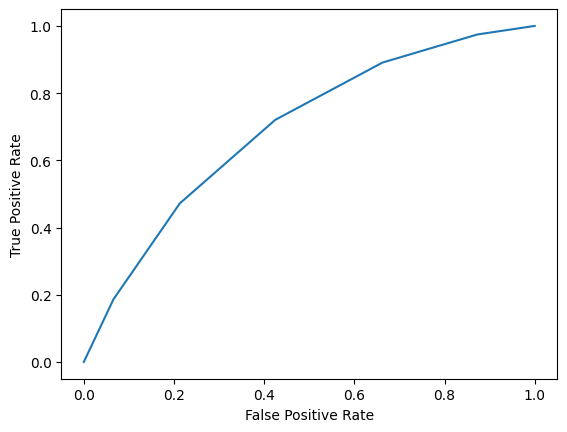

In [37]:
test_y_proba = knn.predict_proba(test)[::,1]
fpr, tpr, _ = roc_curve(test_y,  test_y_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=100))])
X = copy.deepcopy(df)
y = X.pop('Default')
cross_val_score(pipeline, X, y, cv=10).mean()

0.6688415650898969